In [1]:
import pandas as pd
import numpy as np

# Dataset

## Import and modify the dataset

### Import dataset

The dataset is retrieved from the csv file which was created from various county level datasets. 
 
The process and documentation can be found in another notebook in this repository: data_import_modify.ipynb

In [2]:
county_df = pd.read_csv("./data/merged_county_data.csv", dtype={"fips_code": str})

### Modify dataset

####  Group Industries

In [3]:
# Group: Resource Extraction
county_df["pct_employed_resource_extraction"] = county_df[["pct_employed_agriculture_forestry_fishing_hunting_mining"]].sum(axis=1)

# Group: Manufacturing and Construction
county_df["pct_employed_manufacturing_construction"] = county_df[["pct_employed_construction", 
                                                                  "pct_employed_manufacturing"]].sum(axis=1)

# Group: Trade and Transportation
county_df["pct_employed_trade_transportation_utilities"] = county_df[["pct_employed_wholesale_trade", 
                                                                      "pct_employed_retail_trade", 
                                                                      "pct_employed_transportation_warehousing_utilities"]].sum(axis=1)

# Group: Knowledge Based
county_df["pct_employed_knowledge_professional"] = county_df[["pct_employed_information", 
                                                               "pct_employed_finance_insurance_real_estate", 
                                                               "pct_employed_professional_scientific_management_administration"]].sum(axis=1)

# Group: Essential (Public and Social)
county_df["pct_employed_public_social"] = county_df[["pct_employed_education_healthcare_social_assistance", 
                                                      "pct_employed_public_administration"]].sum(axis=1)

# Group: Recreation and Other
county_df["pct_employed_hospitality_other"] = county_df[["pct_employed_arts_entertainment_recreation_food_accommodation", 
                                                          "pct_employed_other_services"]].sum(axis=1)                                                          

In [4]:
# Round newly created columns to 4 decimals

county_rounding_dict = {
    "pct_employed_resource_extraction": 4,
    "pct_employed_manufacturing_construction": 4,
    "pct_employed_trade_transportation_utilities": 4,
    "pct_employed_knowledge_professional": 4,
    "pct_employed_public_social": 4,
    "pct_employed_hospitality_other": 4,
}

county_df = county_df.round(county_rounding_dict)

#### Drop Columns

In [5]:
columns_to_drop = [
    "households",
    "mean_household_size",
    "pct_employed_agriculture_forestry_fishing_hunting_mining",
    "pct_employed_construction",
    "pct_employed_manufacturing",
    "pct_employed_wholesale_trade",
    "pct_employed_retail_trade",
    "pct_employed_transportation_warehousing_utilities",
    "pct_employed_information",
    "pct_employed_finance_insurance_real_estate",
    "pct_employed_professional_scientific_management_administration",
    "pct_employed_education_healthcare_social_assistance",
    "pct_employed_public_administration",
    "pct_employed_arts_entertainment_recreation_food_accommodation",
    "pct_employed_other_services"
]

county_df.drop(columns = columns_to_drop, inplace=True)

## Find missing values

###  NA encodings

To find any different encodings for missing values other than NA (detected by pandas) it is useful to display the 5 most common values for each column. 

In [6]:
# Create a dictionary to store the top 5 values (as a list) for each column (key)
nan_top5_dict = {}

for col in county_df.columns:
    # Get the value counts
    counts = county_df[col].value_counts()
    # Get the first 5 results (most common)
    top5_values = counts.index.tolist()[:5]
    # If fewer than 5 unique values, replace non existing with None
    top5_values += [None] * (5 - len(top5_values))
    nan_top5_dict[col] = top5_values

# Create a new df from the results
nan_top5_df = pd.DataFrame.from_dict(nan_top5_dict, orient="index", 
                                 columns=["#1", "#2", "#3", "#4", "#5"])

nan_top5_df

,#1,#2,#3,#4,#5
fips_code,56045,01001,01003,01005,01007
county_name,Washington County,Jefferson County,Franklin County,Lincoln County,Jackson County
state_name,Texas,Georgia,Virginia,Kentucky,Missouri
rucc,9,8,1,2,6
area_classification,Nonmetro,Metro,None,None,None
latitude,31.869194,33.980816,32.100516,31.752436,46.052904
longitude,-104.567657,-86.642734,-87.72256,-85.393235,-87.126467
population,25619,8810,10489,19229,14342
median_age,40.8,40.3,41.8,41.3,42.2
birth_rate,10.9,11.4,10.4,10.3,11.0


It this case no obvious anomalies could be found with this method. The only thing which is a bit suspicious are the 0's in the "pct_households_limited_english_proficiency" column, this should be investigated.

In [7]:
limited_english_filtered_df = county_df[county_df["pct_households_limited_english_proficiency"] == 0]

limited_english_filtered_df = limited_english_filtered_df[["fips_code", "county_name", "state_name", "population", "pct_households_limited_english_proficiency"]]

limited_english_filtered_df

,fips_code,county_name,state_name,population,pct_households_limited_english_proficiency
11,01023,Choctaw County,Alabama,12252,0.0
18,01037,Coosa County,Alabama,10268,0.0
28,01057,Fayette County,Alabama,15967,0.0
32,01065,Hale County,Alabama,14888,0.0
37,01075,Lamar County,Alabama,13661,0.0
...,...,...,...,...,...
3088,55078,Menominee County,Wisconsin,4226,0.0
3129,56017,Hot Springs County,Wyoming,4661,0.0
3130,56019,Johnson County,Wyoming,8759,0.0
3134,56027,Niobrara County,Wyoming,2354,0.0


After reviewing several cases and the original dataset for these percentages, it appears that these counties generally have a minimal or non-existent "limited English-speaking" population. The reported zeros may be a result of rounding.

### NA and negative values

For finding NA values and negative values, which don't make sense for the variables in this context, creating an overview dataframe can be useful. This is done here!

In [8]:
nan_negative_dict = {}

for col in county_df.columns:

    # For each column find the sum of NaN values
    nan_column_count = county_df[col].isnull().sum()

    # Extract the datatype of the column
    nan_column_dtype = county_df[col].dtype

    # For each numeric column find the sum of negative values
    if nan_column_dtype.kind in "iuf":
        negative_column_count = (county_df[col] < 0).sum()
    else:
        negative_column_count = 0

    nan_negative_list = [nan_column_dtype, int(nan_column_count), int(negative_column_count)]

    # Add results to dictionary
    nan_negative_dict[col] = nan_negative_list

# Create a new df from the results
nan_negative_df = pd.DataFrame.from_dict(nan_negative_dict, orient="index", 
                                 columns=["data_type", "nan_count", "negative_count"])

# Remove all rows (initially columns) that neither contain NaN nor negative values
nan_negative_df = nan_negative_df[(nan_negative_df["nan_count"] != 0) | (nan_negative_df["negative_count"] != 0)]

nan_negative_df


,data_type,nan_count,negative_count
longitude,float64,0,3144
poverty_rate,float64,1,0
unemployment_rate,float64,10,0
median_household_income,int64,0,2
mean_zhvi_home_value,float64,82,0
median_monthly_housing_cost,float64,0,1
median_monthly_housing_cost_owner_occupied,float64,0,3
median_monthly_housing_cost_renter_occupied,float64,0,10


There are a few columns contain NaN values and also negative values, which is a bit odd, because (except longitude) they don't make sense in this context.

In [9]:
negative_columns = ["median_household_income", 
                    "median_monthly_housing_cost", 
                    "median_monthly_housing_cost_owner_occupied", 
                    "median_monthly_housing_cost_renter_occupied"]

negative_dictionary = {}

for col in negative_columns:
    # Find all the negative values in the specified columns
    negatives = county_df[county_df[col] < 0][col].unique()
    negative_dictionary[col] = negatives.tolist()

for col, negatives in negative_dictionary.items():
    print(f"{col}: {negatives}")

median_household_income: [-666666666]
median_monthly_housing_cost: [-666666666.0]
median_monthly_housing_cost_owner_occupied: [-666666666.0]
median_monthly_housing_cost_renter_occupied: [-666666666.0]


It seems that these are other encodings for NaN values, which need to be converted to NaN for imputation.

In [10]:
import numpy as np

for col, negatives in negative_dictionary.items():
    county_df[col] = county_df[col].replace(negatives, np.nan)


Let's check again for NaN values and see if the conversion worked.

In [11]:
nan_dict = {}

for col in county_df.columns:

    nan_column_dtype = county_df[col].dtype

    # For each column find the sum of NaN values
    nan_column_count = county_df[col].isnull().sum()

    nan_dict[col] = [nan_column_dtype, nan_column_count]

# Create a new df from the results
nan_df = pd.DataFrame.from_dict(nan_dict, orient="index", 
                                 columns=["data_type", "nan_count"])

nan_df = nan_df[(nan_df["nan_count"] != 0)]

nan_df

,data_type,nan_count
poverty_rate,float64,1
unemployment_rate,float64,10
median_household_income,float64,2
mean_zhvi_home_value,float64,82
median_monthly_housing_cost,float64,1
median_monthly_housing_cost_owner_occupied,float64,3
median_monthly_housing_cost_renter_occupied,float64,10


## Impute missing values

### Imputation Method

Weighted average of nearest counties.

Method inspired by this paper: 

https://ieeexplore.ieee.org/document/7229721

Inverse Distance Weighted Imputation

#### Calculate county distance (haversine)

**Using haversine distance the distance between 2 counties from their latitude and longitude coordinates can be calculated, it works like this:**

Given two points on Earth:
- Point 1: (lat1, lng1)
- Point 2: (lat2, lng2)

1. Convert degrees to radians.

2. Compute the differences:
   - Δlat = lat2 - lat1
   - Δlng = lng2 - lng1

3. Calculate the value of a:
   $$
   a = \sin^2\left(\frac{\Delta \text{lat}}{2}\right) + \cos(\text{lat1}) \cdot \cos(\text{lat2}) \cdot \sin^2\left(\frac{\Delta \text{lng}}{2}\right)
   $$

4. Compute the central angle:
   $$
   c = 2 \arcsin\left(\sqrt{a}\right)
   $$

5. Determine the distance:
   $$
   \text{distance} = r \cdot c
   $$
   where \( r \) is the radius of the Earth (approximately 6371 km).

In [12]:
import numpy as np

# Inspiration:
# https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

def haversine_distance(lat1, lng1, lat2, lng2):

    # Convert decimal degrees to radians 
    lng1, lat1, lng2, lat2 = map(np.radians, [lng1, lat1, lng2, lat2])

    # Compute differences
    dlon = lng2 - lng1 
    dlat = lat2 - lat1 

    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    # Central angle
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371  # Radius of earth (in km)

    distance = c * r

    return distance


For demonstration purposes, let's check the distance between New York and San Francisco with this function.

In [13]:

# Extract longitude and latitude of "New York County"
new_york = county_df[county_df["county_name"] == "New York County"]
new_york_lat = new_york["latitude"].iloc[0]
new_york_lng = new_york["longitude"].iloc[0]

# Extract longitude and latitude of "San Francisco County"
san_francisco = county_df[county_df["county_name"] == "San Francisco County"]
san_francisco_lat = san_francisco["latitude"].iloc[0]
san_francisco_lng = san_francisco["longitude"].iloc[0]

distance_ny_sf = haversine_distance(new_york_lat, new_york_lng, san_francisco_lat, san_francisco_lng)

print(distance_ny_sf)

4133.681584166428


#### Find k-nearest neighbours

For a target latitude and longitude, find the k nearest neighbours in the DataFrame that have non-missing values for `value_col`.
Returns a DataFrame of the k closest rows, each with an extra 'distance' column.

In [14]:
def k_nearest_neighbours(k, county_df, target_lat, target_lng, imputation_col, lat_col="latitude", lng_col ="longitude"):

    # Filter only rows (counties) with non-missing values for the to be imputed column
    non_missing_df = county_df[county_df[imputation_col].notna()].copy()
    
    # Compute the distance from the target point to every (non missing) observation
    non_missing_df["distance"] = non_missing_df.apply(
        lambda row: haversine_distance(target_lat, target_lng, row[lat_col], row[lng_col]),
        axis=1
    )

    # Get the k rows with the smallest distance
    k_neighbours = non_missing_df.sort_values(by="distance").head(k)

    return k_neighbours

Let's see if this works by finding the 5 nearest neighbours for "New York County" (lat, lng for this county have been extracted above).

In [15]:
k_neighbours_ny = k_nearest_neighbours(5, county_df, new_york_lat, new_york_lng, "mean_household_income")

k_neighbours_ny = k_neighbours_ny[["fips_code", "county_name", "state_name", "latitude", "longitude", "distance"]]

k_neighbours_ny


,fips_code,county_name,state_name,latitude,longitude,distance
1860,36061,New York County,New York,40.779400,-73.966705,0.000000
1784,34017,Hudson County,New Jersey,40.740792,-74.075102,10.088669
1832,36005,Bronx County,New York,40.850073,-73.867523,11.463984
1870,36081,Queens County,New York,40.703454,-73.819579,14.998446
1853,36047,Kings County,New York,40.641311,-73.938368,15.539449


"New York County" itself is seen as the nearest neighbour with a distance of 0. This makes sense, because the county is included in the non_missing_df. For imputation purposes, the to be imputed county will not be included, it will be filtered out due to being NA.

#### Weighted k-neigbours imputation

If there are any neighbours (counties) at the exactly same coordinates (distance = 0) the value directly will be used.

For each neighbour \( i \), compute the weight as:
$$
w_i = \frac{1}{d_i}
$$
where \( d_i \) is the distance to the \( i \)-th neighbour.

Then, the imputed value is calculated as:
$$
\text{imputed value} = \frac{\sum_{i=1}^{k} w_i \cdot v_i}{\sum_{i=1}^{k} w_i}
$$
where \( v_i \) represents the value from the imputation column for the \( i \)-th neighbour.

In [16]:
def imputation(k, county_df, imputation_col, lat_col = "latitude", lng_col = "longitude"):

    # Create a copy of the df
    df_imputed = county_df.copy()
    
    # Identify rows with missing values in imputation_col and get the index
    missing_idx = df_imputed[df_imputed[imputation_col].isna()].index
    
    # Loop trough the missing values
    for idx in missing_idx:
        # Extract the target (lat, lng coordinates) location for the missing value
        target_lat = df_imputed.loc[idx, lat_col]
        target_lng = df_imputed.loc[idx, lng_col]
        
        # Retrieve the k nearest neighbours with the prebuilt function
        k_neighbours = k_nearest_neighbours(k, df_imputed, target_lat, target_lng, imputation_col)
        
        # Check if any neighbour is exactly at the same location (distance = 0)
        if (k_neighbours["distance"] == 0).any():
            # Use the neighbour's value directly if found
            imputed_value = k_neighbours.loc[k_neighbours["distance"] == 0, imputation_col].iloc[0]
        else:
            # Compute weights as the inverse of distance
            weights = 1 / k_neighbours["distance"]
            # Calculate the weighted average of the neighbour values
            imputed_value = np.sum(k_neighbours[imputation_col] * weights) / np.sum(weights)
        
        # Replace the missing value with the imputed value
        df_imputed.loc[idx, imputation_col] = imputed_value
    
    return df_imputed

Let's check if this function works as expected with the poverty rate column which has 1 missing value.

In [17]:
poverty_rate_missing = county_df[county_df["poverty_rate"].isna()]

poverty_rate_missing = poverty_rate_missing[["fips_code", "county_name", "state_name", "latitude", "longitude", "poverty_rate"]]

poverty_rate_missing

,fips_code,county_name,state_name,latitude,longitude,poverty_rate
550,15005,Kalawao County,Hawaii,21.170909,-156.947457,NaN


What are the 5 nearest counties for "Kalawao County" in Hawaii?

In [18]:
poverty_rate_missing_lat = poverty_rate_missing["latitude"].iloc[0]

poverty_rate_missing_lng = poverty_rate_missing["longitude"].iloc[0]

poverty_rate_k_neighbours = k_nearest_neighbours(5, county_df, poverty_rate_missing_lat, poverty_rate_missing_lng, "poverty_rate")

poverty_rate_k_neighbours = poverty_rate_k_neighbours[["fips_code", "county_name", "state_name", "latitude", "longitude", "poverty_rate", "distance"]]

poverty_rate_k_neighbours

,fips_code,county_name,state_name,latitude,longitude,poverty_rate,distance
552,15009,Maui County,Hawaii,20.859631,-156.564988,0.094,52.669694
549,15003,Honolulu County,Hawaii,21.487412,-158.066657,0.091,121.149355
548,15001,Hawaii County,Hawaii,19.598366,-155.518306,0.165,229.702606
551,15007,Kauai County,Hawaii,22.040127,-159.595789,0.094,290.343586
207,06041,Marin County,California,38.073464,-122.723567,0.087,3773.184809


Now let's impute the missing value with the imputation function.

In [19]:
poverty_rate_imputed = imputation(5, county_df, "poverty_rate")

poverty_rate_imputed = poverty_rate_imputed[county_df["fips_code"] == "15005"]

poverty_rate_imputed = poverty_rate_imputed[["fips_code", "county_name", "state_name", "latitude", "longitude", "poverty_rate"]]

poverty_rate_imputed

,fips_code,county_name,state_name,latitude,longitude,poverty_rate
550,15005,Kalawao County,Hawaii,21.170909,-156.947457,0.102001


### Apply imputation

Let's check again which columns need imputation.

In [20]:
nan_df

,data_type,nan_count
poverty_rate,float64,1
unemployment_rate,float64,10
median_household_income,float64,2
mean_zhvi_home_value,float64,82
median_monthly_housing_cost,float64,1
median_monthly_housing_cost_owner_occupied,float64,3
median_monthly_housing_cost_renter_occupied,float64,10


The k-nearest neighbour weighted average imputation method from above can be used for all the columns except: 

- "median_monthly_housing_cost_owner_occupied"
- "median_monthly_housing_cost_renter_occupied"

The values for these will be computed from the "median_monthly_housing_cost".

#### k-neighbours weighted distance imputation

For number of neighbours (k) which will be chosen to calculate the missing value from, taking 5 seems like a decent choice.

In [21]:
# Number of neighbours considered for imputation
k = 5 

# Get the indizes of the rows with missing values
imputation_missing_index = county_df[county_df.isna().any(axis=1)].index

# Imputation
county_df = imputation(k, county_df, "poverty_rate")
county_df = imputation(k, county_df, "unemployment_rate")
county_df = imputation(k, county_df, "median_household_income")
county_df = imputation(k, county_df, "mean_zhvi_home_value")
county_df = imputation(k, county_df, "median_monthly_housing_cost")

# Get a df with only the rows that previously contained missing values
missing_rows_df = county_df.loc[imputation_missing_index]

missing_rows_df = missing_rows_df[["fips_code", "county_name", "state_name", "poverty_rate", "unemployment_rate", "median_household_income", "mean_zhvi_home_value", "median_monthly_housing_cost"]]

missing_rows_df

,fips_code,county_name,state_name,poverty_rate,unemployment_rate,median_household_income,mean_zhvi_home_value,median_monthly_housing_cost
67,02013,Aleutians East Borough,Alaska,0.180,0.021,72692.0,362507.992782,806.0
68,02016,Aleutians West Census Area,Alaska,0.100,0.030,107344.0,181052.297207,2027.0
70,02050,Bethel Census Area,Alaska,0.293,0.097,70616.0,367271.466095,782.0
71,02060,Bristol Bay Borough,Alaska,0.117,0.037,100625.0,374857.688890,1013.0
72,02063,Chugach Census Area,Alaska,0.087,0.047,88565.0,344129.103931,1320.0
...,...,...,...,...,...,...,...,...
2704,48359,Oldham County,Texas,0.123,0.030,76402.0,186734.994571,1014.0
2721,48393,Roberts County,Texas,0.090,0.036,66118.0,123310.521532,691.0
2731,48413,Schleicher County,Texas,0.160,0.035,90141.0,181130.310667,855.0
2746,48443,Terrell County,Texas,0.186,0.035,46989.0,114348.000000,522.0


Let's check again for missing values:

In [22]:
nan_dict = {}

for col in county_df.columns:
    nan_column_dtype = county_df[col].dtype
    nan_column_count = county_df[col].isnull().sum()
    nan_dict[col] = [nan_column_dtype, nan_column_count]

nan_df = pd.DataFrame.from_dict(nan_dict, orient="index", 
                                 columns=["data_type", "nan_count"])

nan_df = nan_df[(nan_df["nan_count"] != 0)]

nan_df

,data_type,nan_count
median_monthly_housing_cost_owner_occupied,float64,3
median_monthly_housing_cost_renter_occupied,float64,10


Only the excluded columns have remaining missing values, but the imputation worked as expected and the NA's got replaced with the weighted average of the 5 nearest counties.

#### Others imputation

For these two columns we calculate the average percentage difference for all counties between the "median_monthly_housing_cost" and the "..._owner_occupied" and "...renter_occupied". Then the difference is subtracted / added to the "median_monthly_housing_cost" for each row that has a missing value to get the imputed value.

For each imputation column, compute the average percentage difference:

$$
\text{avg\_pct\_diff} = \text{mean}\left(\frac{\text{imputation\_value} - \text{median\_monthly\_housing\_cost}}{\text{median\_monthly\_housing\_cost}}\right)
$$

Then, impute missing values using:

$$
\text{imputed\_value} = \text{median\_monthly\_housing\_cost} \times \left(1 + \text{avg\_pct\_diff}\right)
$$

In [23]:
# "...owner_occupied"
# Use the formula: (owner_cost - median_cost) / median_cost for all non-missing values
avg_pct_diff_owner = (
    (county_df.loc[county_df["median_monthly_housing_cost_owner_occupied"].notna(), "median_monthly_housing_cost_owner_occupied"] - 
     county_df.loc[county_df["median_monthly_housing_cost_owner_occupied"].notna(), "median_monthly_housing_cost"]) 
    / county_df.loc[county_df["median_monthly_housing_cost_owner_occupied"].notna(), "median_monthly_housing_cost"]
).mean()

# "...renter_occupied"
# Use the formula: (renter_cost - median_cost) / median_cost for all non-missing values
avg_pct_diff_renter = (
    (county_df.loc[county_df["median_monthly_housing_cost_renter_occupied"].notna(), "median_monthly_housing_cost_renter_occupied"] - 
     county_df.loc[county_df["median_monthly_housing_cost_renter_occupied"].notna(), "median_monthly_housing_cost"]) 
    / county_df.loc[county_df["median_monthly_housing_cost_renter_occupied"].notna(), "median_monthly_housing_cost"]
).mean()

print("Average percentage difference (owner occupied):", avg_pct_diff_owner)
print("Average percentage difference (renter occupied):", avg_pct_diff_renter)

Average percentage difference (owner occupied): -0.0069879496441517565
Average percentage difference (renter occupied): 0.03528816662890947


In [24]:
# Get the indizes of the rows with missing values in the "...renter_occupied" column
renter_missing_index = county_df[county_df["median_monthly_housing_cost_renter_occupied"].isna()].index

# "...owner_occupied" imputation
# Use the formula: median_cost * (1 + avg_pct_diff_owner) to estimate owner-occupied costs
county_df.loc[
    county_df["median_monthly_housing_cost_owner_occupied"].isna(),
    "median_monthly_housing_cost_owner_occupied"
] = county_df["median_monthly_housing_cost"] * (1 + avg_pct_diff_owner)

# "...renter_occupied" imputation
# Use the formula: median_cost * (1 + avg_pct_diff_renter) to estimate renter-occupied costs
county_df.loc[
    county_df["median_monthly_housing_cost_renter_occupied"].isna(),
    "median_monthly_housing_cost_renter_occupied"
] = county_df["median_monthly_housing_cost"] * (1 + avg_pct_diff_renter)

renter_missing_rows_df = county_df.loc[renter_missing_index]

renter_missing_rows_df = renter_missing_rows_df [["fips_code", "county_name", "state_name", "median_monthly_housing_cost", "median_monthly_housing_cost_renter_occupied"]]

renter_missing_rows_df 


,fips_code,county_name,state_name,median_monthly_housing_cost,median_monthly_housing_cost_renter_occupied
188,06003,Alpine County,California,1734.000000,1795.189681
1126,22023,Cameron Parish,Louisiana,679.000000,702.960665
2541,48033,Borden County,Texas,538.000000,556.985034
2611,48173,Glasscock County,Texas,695.000000,719.525276
2655,48261,Kenedy County,Texas,755.853226,782.525901
2659,48269,King County,Texas,467.000000,483.479574
2666,48283,La Salle County,Texas,667.000000,690.537207
2675,48301,Loving County,Texas,325.000000,336.468654
2680,48311,McMullen County,Texas,663.000000,686.396054
2746,48443,Terrell County,Texas,522.000000,540.420423


The imputation of missing values was successfully, as we can see in this df. 

Let's check again for the entire dataset:

In [25]:
# Count total missing values in the entire dataset
total_missing = county_df.isna().sum().sum()

print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


#### Adjust datatypes

For uniformity the rounding and datatypes for the imputed columns will be adjusted here.

In [26]:
county_rounding_dict = {
    "poverty_rate": 4,
    "unemployment_rate": 4,
    "median_household_income": 0,
    "mean_zhvi_home_value": 0,
    "median_monthly_housing_cost": 0,
    "median_monthly_housing_cost_owner_occupied": 0,
    "median_monthly_housing_cost_renter_occupied": 0,
}

# Round float values to specific decimals
county_df = county_df.round(county_rounding_dict)

# Change floats with 0 decimals to integer type
county_df["median_household_income"] = county_df["median_household_income"].astype("Int64")
county_df["mean_zhvi_home_value"] = county_df["mean_zhvi_home_value"].astype("Int64")
county_df["median_monthly_housing_cost"] = county_df["median_monthly_housing_cost"].astype("Int64")
county_df["median_monthly_housing_cost_owner_occupied"] = county_df["median_monthly_housing_cost_owner_occupied"].astype("Int64")
county_df["median_monthly_housing_cost_renter_occupied"] = county_df["median_monthly_housing_cost_renter_occupied"].astype("Int64")

## Final Dataset

### Checkpoint: Save and retrieve dataset

In [27]:
# Save to csv "county_data.csv"
county_df.to_csv("./data/county_data.csv", index=False)

# Retrieve dataset
county_df = pd.read_csv("./data/county_data.csv", dtype={"fips_code": str})

### Variables and categories

| **Category**                | **Column Name**                                    | **Description** |
|-----------------------------|--------------------------------------------------|----------------------------|
| **Geographics**             | `fips_code`                                     | FIPS Code (Unique county identifier)  |
|                             | `county_name`                                   | Name of the county        |
|                             | `state_name`                                    | Name of the state         |
|                             | `rucc`                                          | Rural-Urban Continuum Code |
|                             | `area_classification`                           | Classification of the area |
|                             | `latitude`                                      | Latitude coordinate       |
|                             | `longitude`                                     | Longitude coordinate      |
| **Demographics**            | `population`                                    | Total population          |
|                             | `median_age`                                    | Median age of population  |
|                             | `males_per_100_females`                         | Males per 100 females     |
|                             | `birth_rate`                                    | Birth rate per 1,000 people |
|                             | `death_rate`                                    | Death rate per 1,000 people |
| **Economic Indicators**     | `poverty_rate`                                  | Poverty rate     |
|                             | `unemployment_rate`                             | Unemployment rate   |
|                             | `labor_force_participation_rate`                | Laborforce participation rate |
|                             | `median_household_income`                       | Median household income   |
|                             | `mean_household_income`                         | Mean household income     |
| **Education & Social Access** | `pct_pop_25plus_highschool_plus`              | % of population aged 25+ with high school graduate or higher |
|                             | `pct_pop_25plus_bachelor_plus`                  | % of population aged 25+  with bachelor's degree or higher |
|                             | `pct_households_limited_english_proficiency`    | % of limited english speaking households |
|                             | `pct_pop_health_insured`                        | % of population with health insurance |
|                             | `pct_households_with_internet`                  | % of households with internet |
| **Housing**                 | `mean_zhvi_home_value`                          | Mean 2023 Zillow Home Value Index (ZHVI) |
|                             | `median_monthly_housing_cost`                   | Median monthly housing cost for all homes |
|                             | `median_monthly_housing_cost_owner_occupied`    | Median monthly housing cost for owner-occupied homes |
|                             | `median_monthly_housing_cost_renter_occupied`   | Median monthly housing cost for renter-occupied homes |
|                             | `pct_households_owner_occupied`                 | % of households that own the housing they live in |
|                             | `pct_households_renter_occupied`                | % of households that rent the housing they live in |
| **Employment & Industry**   | `pct_employed_resource_extraction`              | % employed in agriculture, forestry, fishing, hunting, mining |
|                             | `pct_employed_manufacturing_construction`       | % employed in construction and manufacturing  |
|                             | `pct_employed_trade_transportation_utilities`   | % employed in wholesale trade, retail trade, transportation, warehousing, utilities  |
|                             | `pct_employed_knowledge_professional`           | % employed in information, finance, real estate, professional, scientific, management, administration |
|                             | `pct_employed_public_social`                    | % employed in public administration, education, healthcare, social assistance |
|                             | `pct_employed_hospitality_other`                | % employed in arts, entertainment, recreation, food, accommodation, other services |

In [28]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   fips_code                                    3144 non-null   object 
 1   county_name                                  3144 non-null   object 
 2   state_name                                   3144 non-null   object 
 3   rucc                                         3144 non-null   int64  
 4   area_classification                          3144 non-null   object 
 5   latitude                                     3144 non-null   float64
 6   longitude                                    3144 non-null   float64
 7   population                                   3144 non-null   int64  
 8   median_age                                   3144 non-null   float64
 9   birth_rate                                   3144 non-null   float64
 10  

# Data Analysis

The data analyis will manly focus on mean_income, because it will be the variable used for building the regression model in the next step. 

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

## Mean Income and Population Map

This visualization displays US counties as points on a map, with two key variables represented:

- **Point Size** represents the county's population - larger circles indicate counties with more residents, while smaller circles show less populated areas.
- **Color** represents mean household income - using a gradient from green (lower income) through blue to purple (higher income).

The map provides a geographic distribution of both demographic and economic data across the contiguous United States (=mainland US, excluding Hawaii and Alaska).

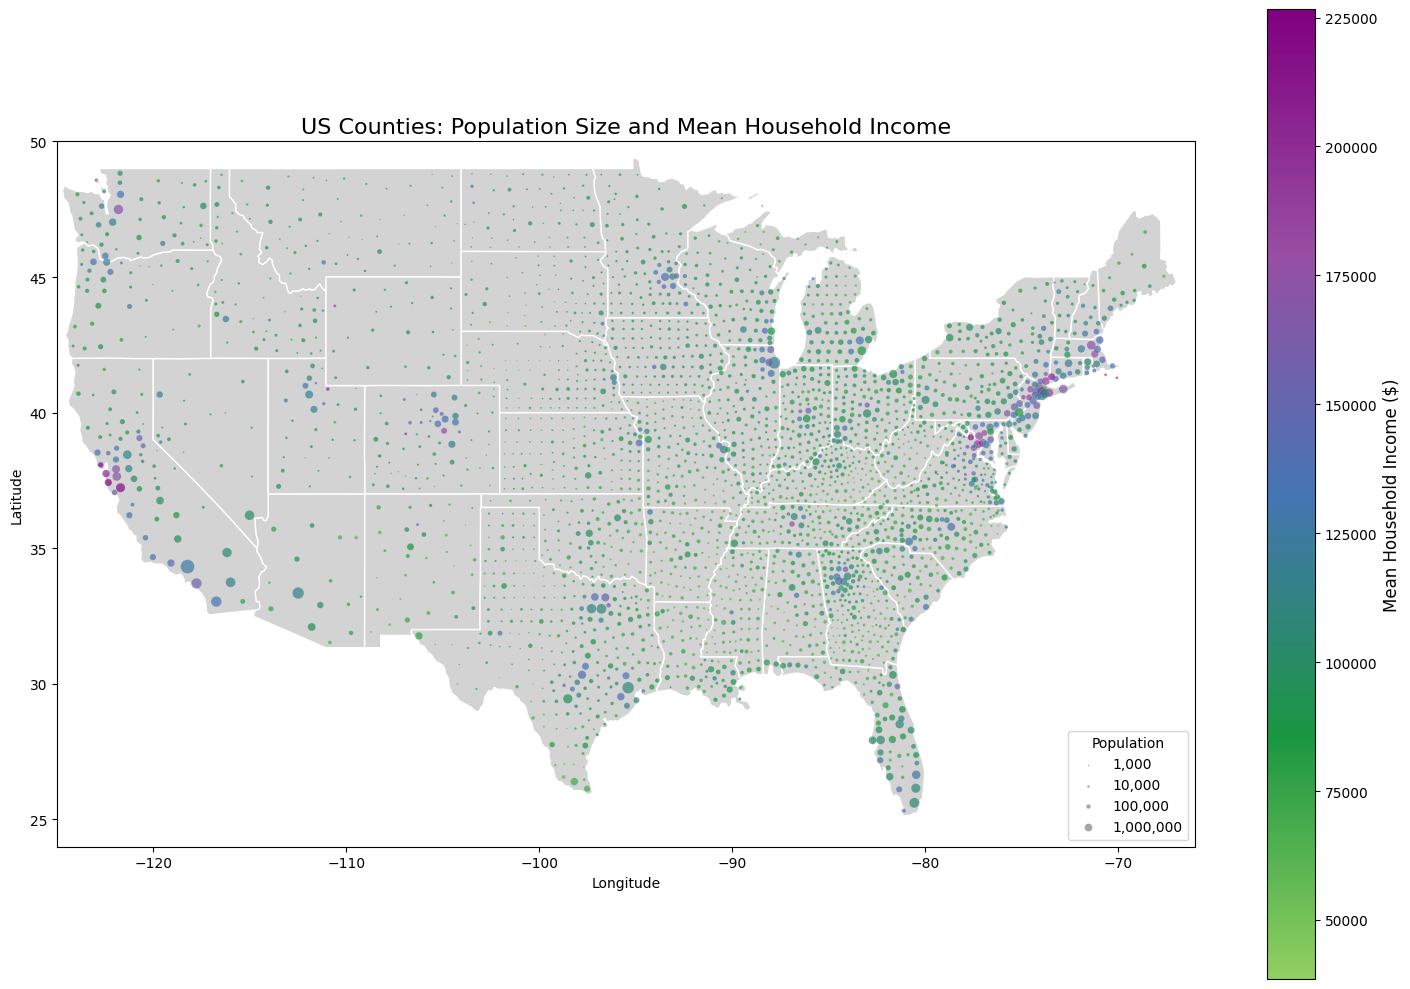

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Initialize figure with appropriate dimensions for US map visualization
fig, ax = plt.subplots(figsize=(15, 10))

# Load and plot US state boundaries as background
usa = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
usa.plot(ax=ax, color="lightgrey", edgecolor="white")

# Set up income color normalization range
min_income = county_df["mean_household_income"].min()
max_income = county_df["mean_household_income"].max()
norm = Normalize(vmin=min_income, vmax=max_income)

# Define custom colormap for income visualization (green to purple gradient)
colors = ["#91cf60", "#1a9641", "#4575b4", "#984ea3", "#800080"]
cmap = LinearSegmentedColormap.from_list("income_cmap", colors)

# Get population range for scaling
min_pop = county_df["population"].min()
max_pop = county_df["population"].max()

# Scale factor controls overall point size
scale_factor = 100

# Calculate point sizes using square root scaling for better visual distinction (ensures large population centers are visible without overwhelming)
county_df["point_size"] = scale_factor * (county_df["population"] / max_pop) ** 0.5

# Plot counties as points with coordinates, sized by population and colored by income
scatter = ax.scatter(
    county_df["longitude"], 
    county_df["latitude"],
    s=county_df["point_size"],
    c=county_df["mean_household_income"],
    cmap=cmap,
    alpha=0.7,
    edgecolor="white",
    linewidth=0.1
)

# Add color legend showing income scale
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label("Mean Household Income ($)", fontsize=12)

# Set visualization title and axis labels
plt.title("US Counties: Population Size and Mean Household Income", fontsize=16)
ax.set_xlabel("Longitude", fontsize=10)
ax.set_ylabel("Latitude", fontsize=10)

# Create population size reference legend with representative values
handles, labels = [], []
for pop in [1000, 10000, 100000, 1000000]:
    # Use same scaling formula as the main visualization
    size = scale_factor * (pop / max_pop) ** 0.5
    handles.append(plt.scatter([], [], s=size, color="gray", alpha=0.7, edgecolor="white", linewidth=0.1))
    labels.append(f"{pop:,}")

# Add population legend to the map
legend = ax.legend(handles, labels, 
                  scatterpoints=1,
                  loc="lower right", 
                  title="Population",
                  fontsize=10,
                  frameon=True)

# Remove grid lines for cleaner appearance
ax.grid(False)

# Set map boundaries to show contiguous United States
# Longitude limits (West to East)
ax.set_xlim(-125, -66)
# Latitude limits (South to North)
ax.set_ylim(24, 50)

# Adjust the layout
plt.tight_layout()
# Save plot as image
plt.savefig("./plots/county_map.png", dpi=300, bbox_inches="tight")
plt.show()

From this visualization some patterns in US county demographics and economics can be seen:

1. **Coastal Prosperity**: Higher incomes (blue/purple) concentrate along the coasts, particularly in California and the Northeast.
2. **Urban-Rural Economic Divide**: Major metropolitan areas display significantly higher household incomes than surrounding rural counties.
3. **Population Centers**: Larger population centers (bigger circles) often correlate with higher income levels, particularly visible in major urban hubs.
4. **Concentrated Wealth**: The highest income levels (deep purple) appear in select metropolitan areas like San Francisco, New York, and Washington DC.

## Correlation Heatmap

This visualization displays the pairwise correlation coefficients between 17 key demographic and economic variables across the US counties. The heatmap uses a color gradient where:

- Red colors indicate positive correlations (variables increase together)
- Blue colors indicate negative correlations (when one increases, the other decreases)
- Lighter colors show weak or no correlation
- Each cell contains the exact correlation coefficient between variables

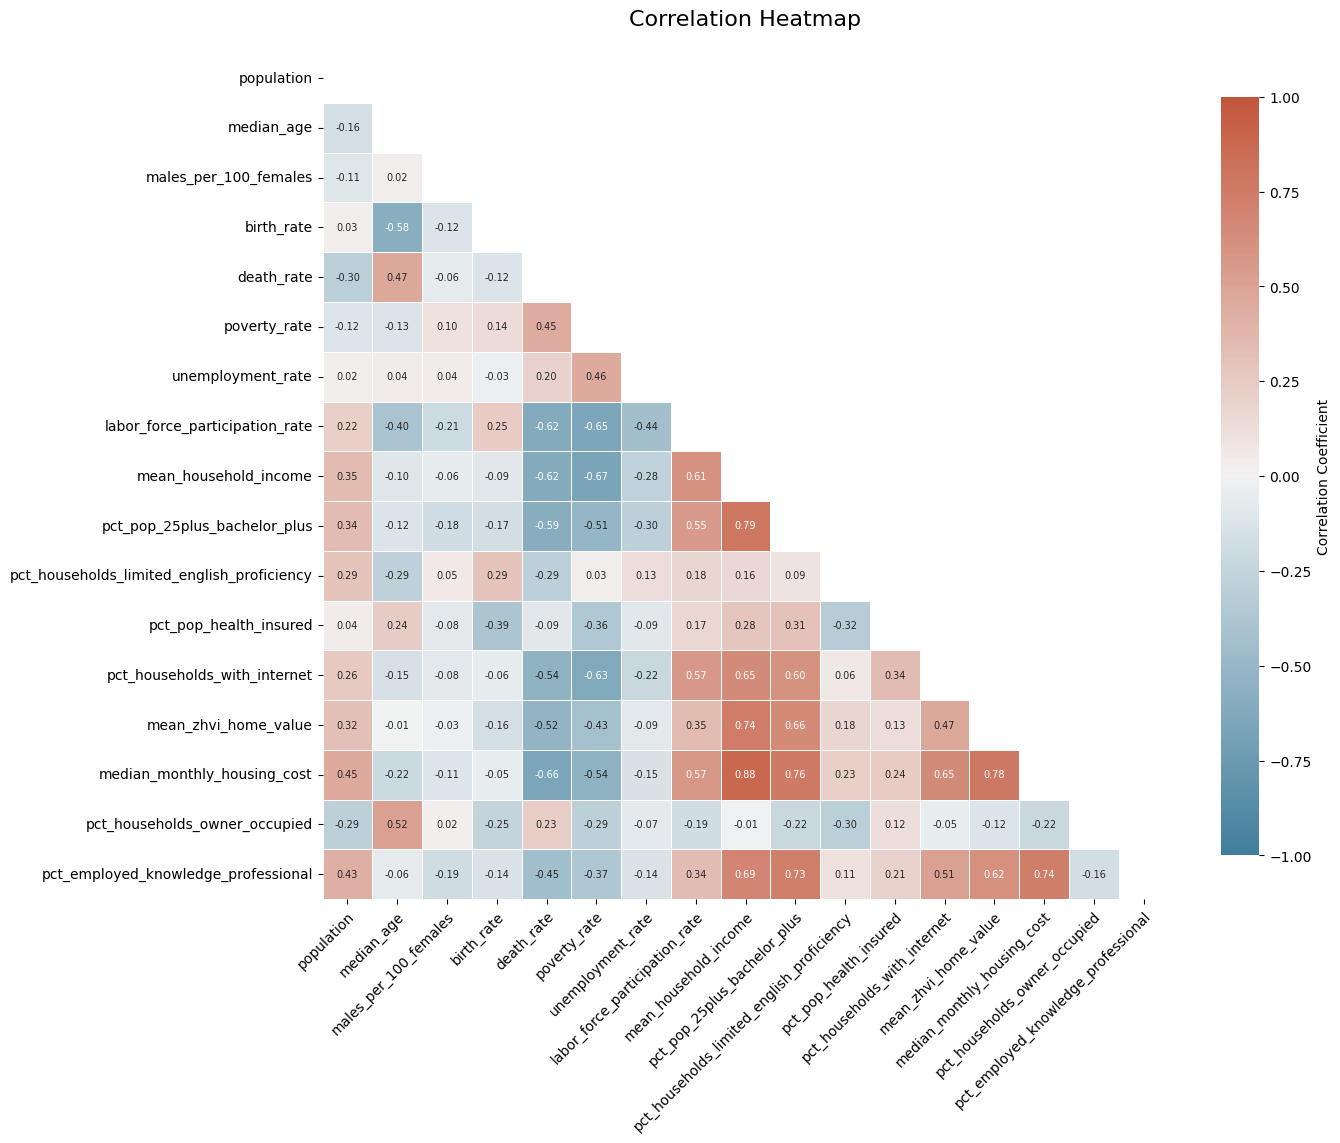

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to include in the correlation matrix
correlation_variables = [
    "population",
    "median_age",
    "males_per_100_females",
    "birth_rate",
    "death_rate",
    "poverty_rate",
    "unemployment_rate",
    "labor_force_participation_rate",
    "mean_household_income",
    "pct_pop_25plus_bachelor_plus",
    "pct_households_limited_english_proficiency",
    "pct_pop_health_insured",
    "pct_households_with_internet",
    "mean_zhvi_home_value",
    "median_monthly_housing_cost",
    "pct_households_owner_occupied",
    "pct_employed_knowledge_professional"
]

# Calculate correlation matrix for the selected variables
correlation_matrix = county_df[correlation_variables].corr()

# Set up the figure with appropriate size
plt.figure(figsize=(14, 12))

# Create a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the heatmap with a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create the heatmap
ax = sns.heatmap(
    correlation_matrix, 
    mask=mask,
    cmap=cmap,
    vmax=1.0, 
    vmin=-1.0,
    center=0,
    square=True, 
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7}
)

# Rename the axis labels with more readable names
plt.xticks(
    np.arange(len(correlation_variables)) + 0.5, 
    rotation=45, 
    ha="right", 
    rotation_mode="anchor"
)

plt.yticks(
    np.arange(len(correlation_variables)) + 0.5, 
    rotation=0
)

plt.title("Correlation Heatmap", fontsize=16, pad=20)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("./plots/county_correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

### Interpretation

The correlation heatmap reveals that mean household income in US counties shows several strong relationships with other variables:

- **Education**: A strong correlation (0.79) is with bachelor's degree attainment, indicating counties with higher education levels consistently have higher incomes.

- **Housing Market**: Income strongly correlates with monthly housing costs (0.88) and home values (0.74), reflecting how housing markets scale with local economic conditions.

- **Professional Employment**: Strong correlation (0.69) with knowledge professional employment suggests specialized workforce composition drives higher incomes.

- **Digital Access**: Positive correlation (0.65) with internet access highlights digital connectivity as an economic enabler.

- **Economic Participation**: Positive correlation (0.61) with labor force participation but negative correlations with poverty (-0.67) and unemployment (-0.28) demonstrate how income relates to overall economic engagement.

- **Limited Demographic Factors**: Weaker correlations with population (0.35), median age (0.10), and gender ratio (-0.06) suggest income patterns transcend basic demographic characteristics.

These relationships reveal mean household income as a central economic indicator that consistently aligns with education levels, housing costs, workforce composition, and technology access while being less influenced by demographic structure.

## Income, Education, Poverty Plot

This scatter plot visualizes the relationship between education levels, income, poverty rates, and population size across US counties. Each point represents a county, with:

- X-axis: Percentage of population with bachelor's degree or higher
- Y-axis: Mean household income in dollars
- Color: Poverty rate (lighter colors indicate lower poverty)
- Circle size: County population
- Red line: Linear regression showing the overall trend between education and income

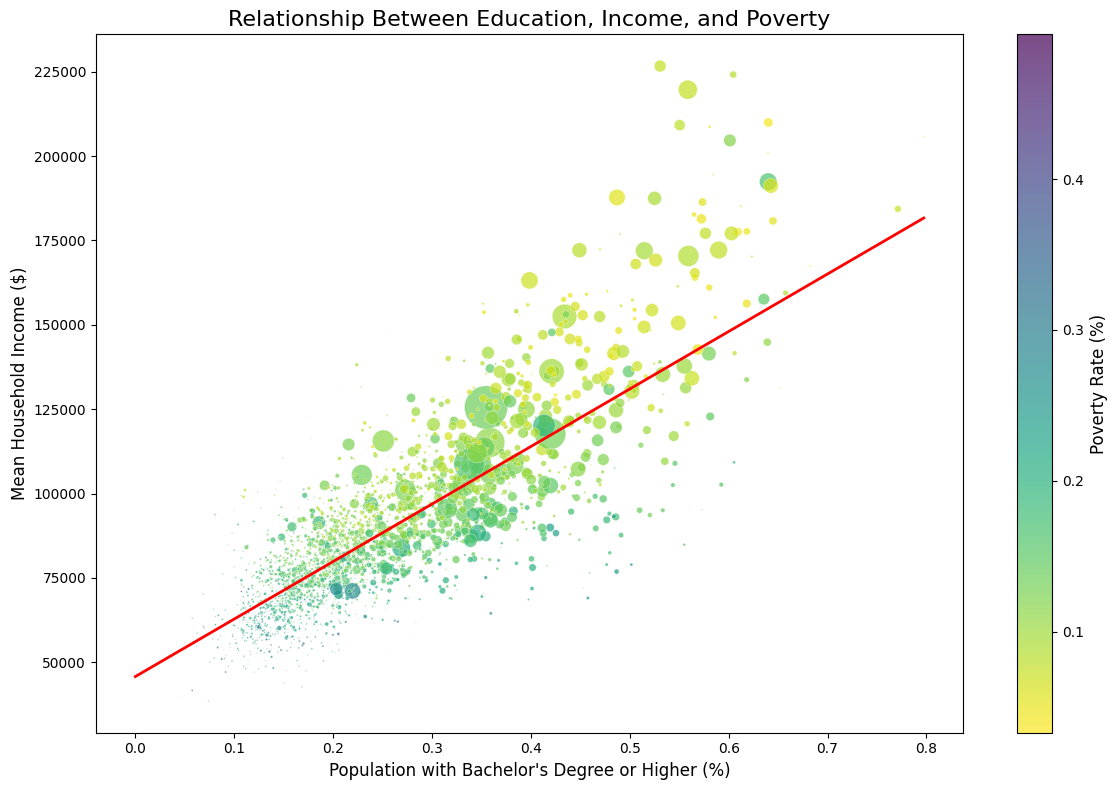

In [54]:
plt.figure(figsize=(12, 8))

# Create multivariate scatter plot: education vs income, with poverty as color and population as size
scatter = plt.scatter(
    x=county_df["pct_pop_25plus_bachelor_plus"],
    y=county_df["mean_household_income"],
    c=county_df["poverty_rate"],
    cmap="viridis_r",
    alpha=0.7,
    s=county_df["population"] / 10000,
    edgecolor="white",
    linewidth=0.3
)

# Add regression line
sns.regplot(
    x=county_df["pct_pop_25plus_bachelor_plus"],
    y=county_df["mean_household_income"],
    scatter=False,
    color="red",
    line_kws={"linewidth": 2},
    ci=None
)

# Add colorbar legend for poverty rate values
cbar = plt.colorbar(scatter)
cbar.set_label("Poverty Rate (%)", fontsize=12)

# Set axis labels and title
plt.xlabel("Population with Bachelor's Degree or Higher (%)", fontsize=12)
plt.ylabel("Mean Household Income ($)", fontsize=12)
plt.title("Relationship Between Education, Income, and Poverty", fontsize=16)

# Adjust layout
plt.tight_layout()
# Save plot
plt.savefig("./plots/county_education_income_poverty_plot.png", dpi=300, bbox_inches="tight")
plt.show()

### Interpretation

Mean household income shows a clear positive relationship with educational attainment across US counties:

- **Education Connection**: Counties with more college graduates consistently have higher mean incomes, as shown by the upward regression line.

- **Poverty Pattern**: Higher-income counties (upper part of plot) display lower poverty rates (lighter colors), while lower-income counties show higher poverty (darker colors).

- **Population Factor**: Larger counties (bigger circles) typically cluster in middle to high-income ranges, often performing better than smaller counties with similar education levels.

- **Outliers**: Several counties achieve exceptionally high incomes (above $200,000), appearing well above the regression line and typical income-education relationship.

This visualization confirms that while education strongly predicts income, factors like poverty rates and population size also play significant roles in county economic outcomes.